# Explore Atlas

Code blocks to explore a statistical shape atlas. We can compute the variance explained by the shape modes, visualize the average shape, look at how each shape mode affects the mean shape, and project a new model onto the atlas to generate z-scores.

### Import python modules

In [18]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import *
import seaborn as sns
import h5py as h5
sns.set_style("ticks")
%matplotlib inline

In [7]:
# this allows us to access local files in this folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load shape atlas

The atlas I'm using is downloaded from the [Cardiac Atlas Project website](https://www.cardiacatlas.org/biventricular-modes/).

In [21]:
# Load shape atlas
file_path_in = '/content/drive/My Drive/UCSD/PhD Third Year/SSA_tutorial/' #replace with your file path

pc = h5.File(file_path_in + 'UKBRVLV_All.h5', 'r')

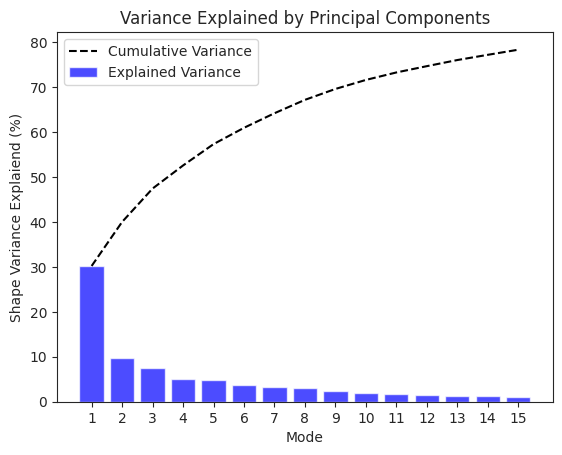

In [33]:
# plot variance
num_modes = 15
explained_variance = pc["EXPLAINED"][0][0:num_modes]
cumulative_variance = np.cumsum(explained_variance)

# Create the figure and axis
fig, ax = plt.subplots()

# Bar chart for explained variance
pc_indices = np.arange(1, num_modes + 1)
ax.bar(pc_indices, explained_variance, alpha=0.7, color='b', label='Explained Variance')

# Line plot for cumulative variance
ax.plot(pc_indices, cumulative_variance, color='black', linestyle='dashed', label='Cumulative Variance')

# Set x-axis labels
ax.set_xticks(pc_indices)
ax.set_xticklabels(pc_indices)

# Add labels, title, and legend
ax.set_xlabel('Mode')
ax.set_ylabel('Shape Variance Explaiend (%)')
ax.set_title('Variance Explained by Principal Components')
ax.legend(loc='upper left')

# Show the plot
plt.show()
plt.close()

### Visualize Atlas Shape and Modes

In [73]:
def genModel(atlas, mode, score):
  S = np.transpose(pc['MU']) + (score * np.sqrt(pc['LATENT'][0,mode]) * pc['COEFF'][mode,:])

  # get ED & ES points, & convert to 3 columns matrix [x, y, z]
  N = S.shape[1] // 2
  ed = np.reshape(S[0,:N], (-1,3))
  es = np.reshape(S[0,N:], (-1,3))
  return ed, es

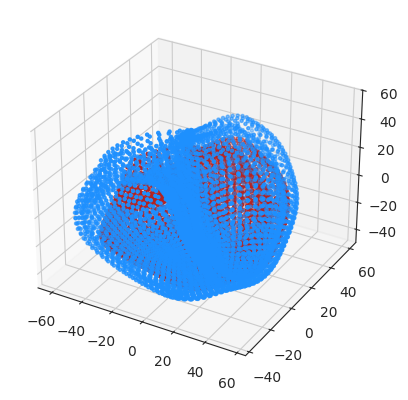

In [74]:
# visualize average shape
ed, es = genModel(pc, 0, 0)

# plot ED points in blue and ES points in red
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ed[:,0], ed[:,1], ed[:,2], color='dodgerblue', marker='.')
ax.scatter(es[:,0], es[:,1], es[:,2], color='firebrick', marker='.')

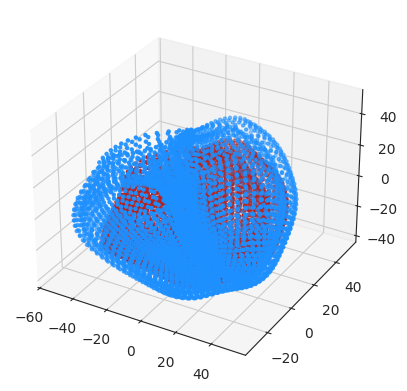

In [78]:
# generate the first PC with 1.5 times the standard deviation
ed, es = genModel(pc, 0, 1.5)

# plot ED points in blue and ES points in red
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ed[:,0], ed[:,1], ed[:,2], color='dodgerblue', marker='.')
ax.scatter(es[:,0], es[:,1], es[:,2], color='firebrick', marker='.')